## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Maanik Gupta

# Maya Sandlin

# Robert Golden

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Read CSVs for later use
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

#print(movie_gross.info())
#Clean studio, domestic_gross, & foreign_gross
#movie_gross = movie_gross.dropna()
#movie_gross.info()

rt_movie_info = rt_movie_info.dropna()
#Clean synopsis, rating, genre, director, writer, theater_date, dvd_date, runtime 
ratings = []
for rating in rt_movie_info['rating'].dropna():
    ratings.append(rating)

runtime_raw = [] #for freshly-extracted runtimes
runtime_clean = [] #rfor runtime w/o whitespace
box_off_raw = [] #for raw box office sales data
box_off_clean = [] #for box office sales data without commas or whitespace
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters, movies under 100 min will have whitespace
    runtime_raw.append(val) 
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '') 
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)

#create new column 'runtime_clean'
rt_movie_info['runtime_clean'] = runtime_clean
#create new column 'box_office_clean'
rt_movie_info['box_office_clean'] = box_off_clean

#create new dataframe
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()
#ensure runtime valuse are recognized as integers
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
#ensure box office slaes values are recognized as integers
df2['box_office_clean'] = df2['box_office_clean'].astype(int)


In [125]:
#Descriptive Stats for Runtime
max1 = df2['runtime_clean'].max()
Q1_3 = df2['runtime_clean'].quantile(q=0.75)
mean1 = df2['runtime_clean'].mean()
med1 = df2['runtime_clean'].median()
std1 = df2['runtime_clean'].std()
Q1_1 = df2['runtime_clean'].quantile(q=0.25)
min1 = df2['runtime_clean'].min()

print('Descriptive Statistics for Runtime')
print('Mean runtime:', mean1)
print('')
print('Maximum runtime:', max1)
print('75th Percentile:', Q1_3)
print('Median runtime:', med1)
print('25th Percentile:', Q1_1)
print('Minimum runtime:', min1)
print('Interquartile Range:', Q1_3-Q1_1)
print('Std. Dev. of runtime:', std1)

print('99.7% of observations should lay between:', mean1-(std1*2), '-',mean1+(std1*2))

print('') #for readability
#Descriptive Stats for Box Office Sales
mean2 = df2['box_office_clean'].mean()
max2 = df2['box_office_clean'].max()
Q2_3 = df2['box_office_clean'].quantile(q=0.75)
med2 = df2['box_office_clean'].median()
Q2_1 = df2['box_office_clean'].quantile(q=0.25)
min2 = df2['box_office_clean'].min()
std2 = df2['box_office_clean'].std()

print('Descriptive Statistics for Box Office Sales')
print('Mean box office sales:', mean2)
print('')
print('Maximum sales:', max2)
print('75th Percentile:', Q2_3)
print('Median sales:', med2)
print('25th Percentile:', Q2_1)
print('Minimum sales:', min2)
print('Std. Dev of Sales:', std2)
print('Interquartile Range:', Q2_3-Q2_1)
print('99.7% of observations should lay between:', mean2-(std2*2), '-', mean2+(std2*2222))

print('') #for readability
print('Correlation Coefficient')      
print(df2.corr()) #calculate Pearson correlation coefficient for variables in df2

#generate a normal distribution where mean1 is avg, sd1 is std dev, and n=235
d1 = np.random.normal(mean1, std1, 235) 
#generate a normal distribution where mean2 is avg, sd2 is std dev, and n=235
d2 = np.random.normal(mean2, std2, 235) 

df2more = df2[df2['runtime_clean'] > 105]
df2less = df2[df2['runtime_clean'] < 105]
print('')
print('Less - Runtime Mean:', df2less['runtime_clean'].mean(), 
      'Box Office Sales Mean:', df2less['box_office_clean'].mean(), 
      'n:', len(df2less))
print('More - Runtime Mean:', df2more['runtime_clean'].mean(),
      'Box Office Sales Mean:', df2more['box_office_clean'].mean(), 
      'n:', len(df2more))
#df2['runtime_clean'].plot.box(grid='True')
#df2['box_office_clean'].plot.box(grid='True')

Descriptive Statistics for Runtime
Mean runtime: 106.66382978723404

Maximum runtime: 188
75th Percentile: 117.0
Median runtime: 105.0
25th Percentile: 93.0
Minimum runtime: 67
Interquartile Range: 24.0
Std. Dev. of runtime: 18.147124581299227
99.7% of observations should lay between: 70.36958062463557 - 142.9580789498325

Descriptive Statistics for Box Office Sales
Mean box office sales: 41958400.02127659

Maximum sales: 368000000
75th Percentile: 52649522.5
Median sales: 15536310.0
25th Percentile: 2302444.5
Minimum sales: 363
Std. Dev of Sales: 62630155.51836797
Interquartile Range: 50347078.0
99.7% of observations should lay between: -83301911.01545934 - 139206163961.8349

Correlation Coefficient
                  runtime_clean  box_office_clean
runtime_clean          1.000000          0.312157
box_office_clean       0.312157          1.000000

Less - Runtime Mean: 92.43103448275862 Box Office Sales Mean: 28014808.870689657 n: 116
More - Runtime Mean: 121.21929824561404 Box Office 

In [130]:
n = 235 #sample size
df = n - 1 #degrees of freedom = sample size - 1

print('df2more variance:')
print(df2more.var())
print('df2less variance:')
print(df2less.var())
print('')
#test relationship between movie length over 105 minutes
t_ind_runtime = stats.ttest_ind(df2more['runtime_clean'], df2less['runtime_clean'], equal_var=False)

print('T-Test runtime:', t_ind_runtime)


df2


df2more variance:
runtime_clean       2.109161e+02
box_office_clean    5.834085e+15
dtype: float64
df2less variance:
runtime_clean       4.836912e+01
box_office_clean    1.802465e+15
dtype: float64

T-Test runtime: Ttest_indResult(statistic=19.119590244740635, pvalue=2.419161504367383e-43)


,runtime_clean,box_office_clean
1,108,600000
6,82,41032915
7,123,224114
15,108,1039869
18,127,20518224
...,...,...
1530,126,72700000
1537,123,1320005
1541,119,25335935
1542,129,1416189


C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

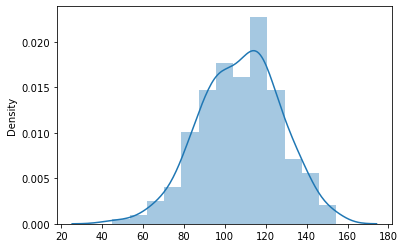

In [84]:
sns.distplot(d1) #distribution for runtime

C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

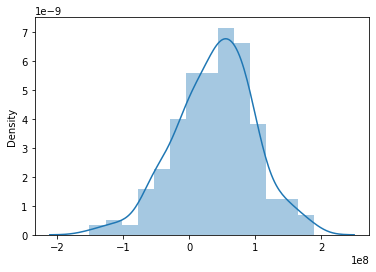

In [352]:
sns.distplot(d2) #distribution for box office sales

C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

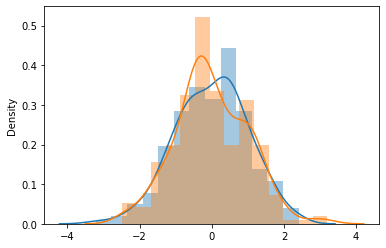

In [82]:
#normalized distribution for runtime
sns.distplot([(x - d1.mean())/d1.std() for x in d1]) 
#normalized distribution for box office sales
sns.distplot([(x - d2.mean())/d2.std() for x in d2])

C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime_clean', ylabel='box_office_clean'>

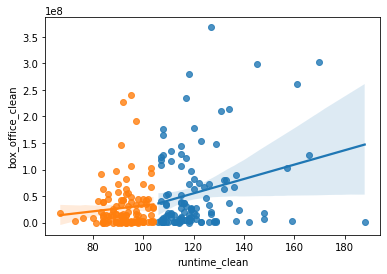

In [121]:
sns.regplot(df2more['runtime_clean'], df2more['box_office_clean'])
sns.regplot(df2less['runtime_clean'], df2less['box_office_clean'])

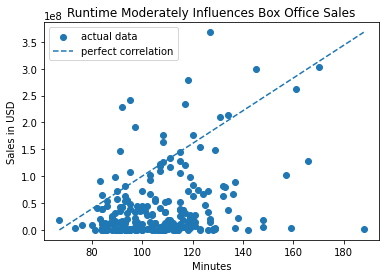

In [116]:
fig, ax = plt.subplots() #Generate Scatter plot 

ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="actual data")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")



ax.set_title("Runtime Moderately Influences Box Office Sales")
ax.set_xlabel("Minutes")
ax.set_ylabel("Sales in USD")



ax.legend();

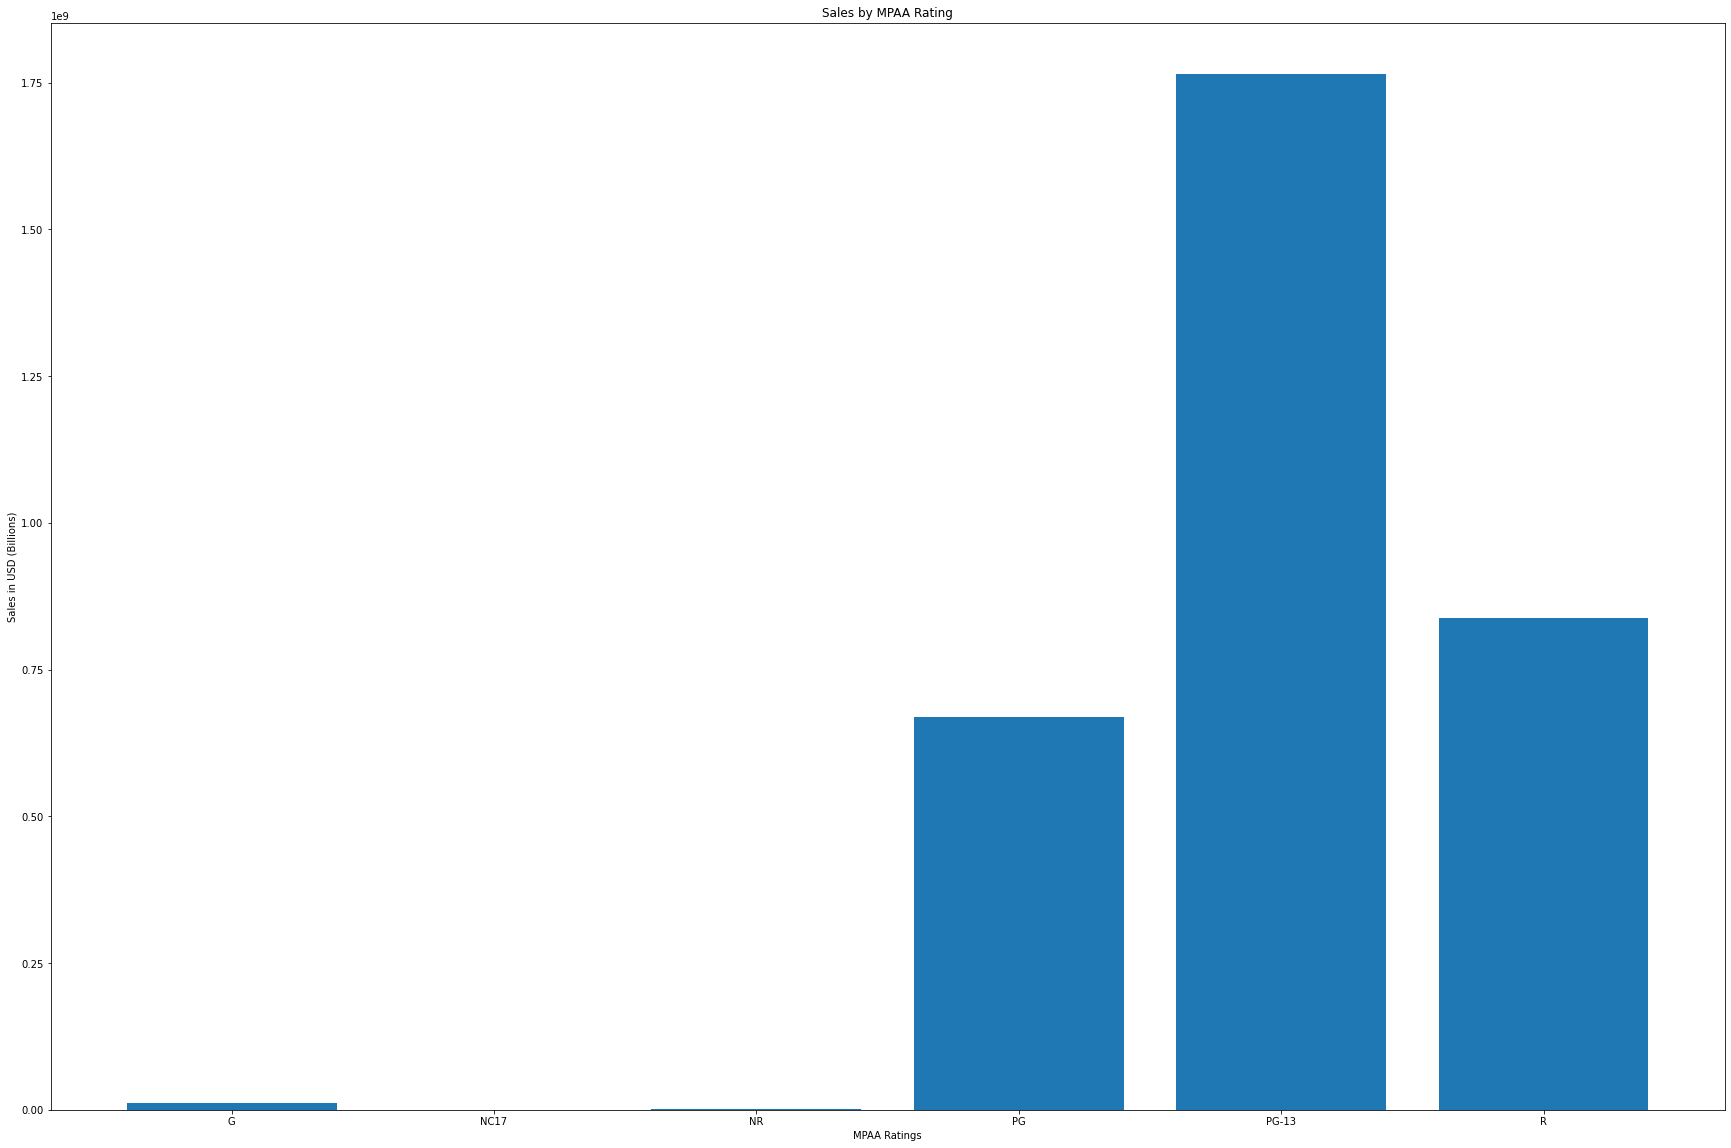

In [168]:
df3 = rt_movie_info[['rating', 'box_office_clean']].copy() #copies rt_movie_info into new dataframe
df3 = df3.dropna() #drops null values

df3['box_office_clean'] = df3['box_office_clean'].astype(int) #ensures box office sales are integers

sales_groupby_rating = df3.groupby('rating')[['box_office_clean']].sum()
sales_groupby_rating = sales_groupby_rating / (10^9)

fig, ax = plt.subplots(figsize=(30,20))
ax.bar(x=sales_groupby_rating.index, height=sales_groupby_rating['box_office_clean'])
plt.title('Sales by MPAA Rating')
plt.xlabel('MPAA Ratings')
plt.ylabel('Sales in USD (Billions)')
plt.show()

# Daniel Robles

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_review = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)


conn = sqlite3.connect('C:/Users/darobles/Desktop/capstone/AIOverlordSupporters/zippedData/im.db')
cur = conn.cursor()
pd.read_sql('''SELECT * FROM SQLITE_MASTER;''', conn)



,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [2]:
from scipy import stats

In [3]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,18-Aug-06,2-Jan-07,$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,23-Jul-93,17-Apr-01,NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1-Jan-62,11-May-04,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1-Apr-93,29-Jan-02,NaN,NaN,101 minutes,NaN


In [5]:
rt_movie_info['box_office']

0              NaN
1          600,000
2              NaN
3              NaN
4              NaN
           ...    
1555    33,886,034
1556           NaN
1557           NaN
1558           NaN
1559           NaN
Name: box_office, Length: 1560, dtype: object

In [6]:
#made copy of df to drop Nan values and do some work
movie_info = rt_movie_info.copy()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,18-Aug-06,2-Jan-07,$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,23-Jul-93,17-Apr-01,NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1-Jan-62,11-May-04,NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1-Apr-93,29-Jan-02,NaN,NaN,101 minutes,NaN


In [7]:
#drop records with nan values
movie_info = movie_info.dropna()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,23-Dec-11,3-Apr-12,$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,17-Feb-16,21-Jun-16,$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,30-Sep-05,20-Dec-05,$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,5-Oct-12,20-Nov-12,$,"1,416,189",129 minutes,Eros Entertainment


In [8]:
#remove commas
movie_info['box_office']=movie_info['box_office'].str.replace(',','')
movie_info

C:\Users\darobles\AppData\Local\Temp\ipykernel_14068\36927435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['box_office']=movie_info['box_office'].str.replace(',','')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,20518224,127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,23-Dec-11,3-Apr-12,$,72700000,126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,17-Feb-16,21-Jun-16,$,1320005,123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,30-Sep-05,20-Dec-05,$,25335935,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,5-Oct-12,20-Nov-12,$,1416189,129 minutes,Eros Entertainment


In [9]:
movie_info['box_office']=movie_info['box_office'].astype(float)

C:\Users\darobles\AppData\Local\Temp\ipykernel_14068\3708461391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['box_office']=movie_info['box_office'].astype(float)


In [10]:
R = movie_info[movie_info['rating']=='R']
PG = movie_info[movie_info['rating']=='PG']
PG13 = movie_info[movie_info['rating']=='PG-13']
G = movie_info[movie_info['rating']=='G']
NC17 = movie_info[movie_info['rating']=='NC17']
NR = movie_info[movie_info['rating']=='NR']

In [11]:
r=R['box_office'].mean()
rmed=R['box_office'].median()
pg=PG['box_office'].mean()
pgmed=PG['box_office'].median()
pg13=PG13['box_office'].mean()
pg13med=PG13['box_office'].median()
g=G['box_office'].mean()
gmed=G['box_office'].median()
nc17=NC17['box_office'].mean()
nc17med=NC17['box_office'].median()
nr=NR['box_office'].mean()
nrmed=NR['box_office'].median()

In [12]:
ratings_dict = {'R':r,'PG':pg,'PG-13':pg13,'G':g,'NC-17':nc17,'NR':nr}

In [13]:
ratings_dict_med = {'R':rmed,'PG':pgmed,'PG-13':pg13med,'G':gmed,'NC-17':nc17med,'NR':nrmed}

Text(0, 0.5, ' Average Revenue (USD)')

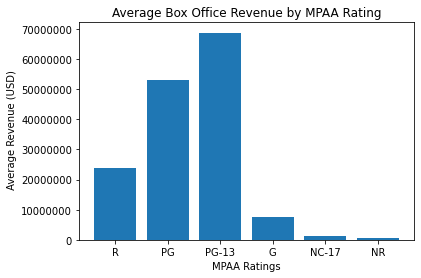

In [35]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict.keys(),ratings_dict.values() )



ax.set_title("Average Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel(" Average Revenue (USD)")

Text(0, 0.5, 'Median Revenue (USD)')

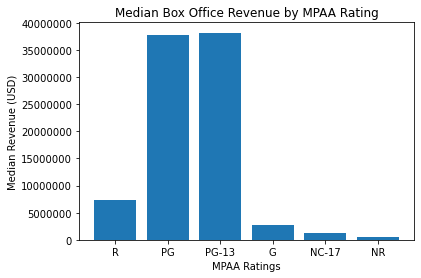

In [36]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(ratings_dict_med.keys(),ratings_dict_med.values() )



ax.set_title("Median Box Office Revenue by MPAA Rating")
ax.set_xlabel("MPAA Ratings")
ax.set_ylabel("Median Revenue (USD)")

In [16]:
action = movie_info[movie_info['genre'].str.contains('Action')]
action_rev=action['box_office'].mean()
action_med=action['box_office'].median()

In [17]:
drama = movie_info[movie_info['genre'].str.contains('Drama')]
drama_rev=drama['box_office'].mean()
drama_med=drama['box_office'].median()

In [18]:
comedy = movie_info[movie_info['genre'].str.contains('Comedy')]
comedy_rev=comedy['box_office'].mean()
comedy_med=comedy['box_office'].median()

In [19]:
horror = movie_info[movie_info['genre'].str.contains('Horror')]
horror_rev=horror['box_office'].mean()
horror_med=horror['box_office'].median()

In [20]:
romance = movie_info[movie_info['genre'].str.contains('Romance')]
romance_rev=romance['box_office'].mean()
romance_med=romance['box_office'].median()

In [21]:
top_genres_rev = {'action':action_rev,'drama':drama_rev,'comedy':comedy_rev,'horror':horror_rev,'romance':romance_rev}

Text(0, 0.5, 'Average Revenue (USD)')

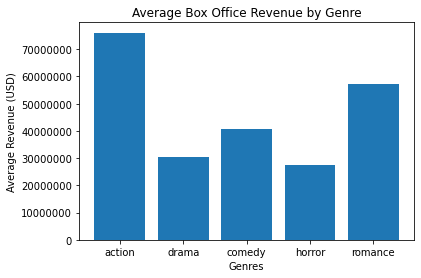

In [37]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(top_genres_rev.keys(),top_genres_rev.values() )





ax.set_title("Average Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Average Revenue (USD)")

In [23]:
top_genres_med = {'action':action_med,'drama':drama_med,'comedy':comedy_med,'horror':horror_med,'romance':romance_med}

Text(0, 0.5, 'Median Revenue (USD)')

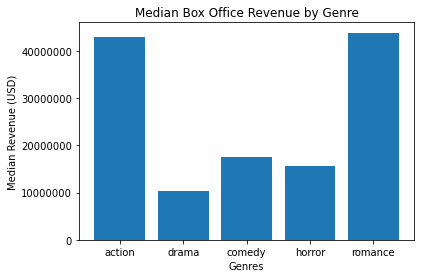

In [38]:
fig, ax=plt.subplots()
plt.ticklabel_format(style='plain')
ax.bar(top_genres_med.keys(),top_genres_med.values() )





ax.set_title("Median Box Office Revenue by Genre")
ax.set_xlabel("Genres")
ax.set_ylabel("Median Revenue (USD)")

In [25]:
movie_info['box_office'].mean()

41958400.02127659

In [26]:
comedy['box_office'].mean()

40530545.931372546

In [27]:
comedy['box_office'].std()

54249600.41858846

In [28]:
pop=movie_info['box_office']
com=comedy['box_office']
act=action['box_office']
drm=drama['box_office']
hor=horror['box_office']

In [29]:
alpha = .05

In [30]:
stats.norm.ppf(alpha), stats.norm.ppf(1-alpha)

(-1.6448536269514729, 1.6448536269514722)

In [31]:
stats.ttest_ind(com,pop)

Ttest_indResult(statistic=-0.1999475067200022, pvalue=0.8416429540851095)

In [32]:
stats.ttest_ind(act,pop)

Ttest_indResult(statistic=3.2392189614205606, pvalue=0.0013430512162730568)

In [33]:
stats.ttest_ind(drm,pop)

Ttest_indResult(statistic=-1.8073438196319902, pvalue=0.07152964453222374)

In [34]:
stats.ttest_ind(rom,pop)

NameError: name 'rom' is not defined

In [ ]:
stats.ttest_ind(hor,pop)

In [ ]:
sorted_movie_info=movie_info.sort_values(by='box_office',ascending=False)
sorted_movie_info.head(10)

In [ ]:
##part 1 of creating csv out of sql table movie_basics
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM movie_basics
                               ''', conn)
sql_query

In [ ]:
##part 2 of creating csv out of sql table movie_basics
basics_df = pd.DataFrame(sql_query, columns = ['movie_id', 'primary_title', 'original_title','start_year','runtime_minutes','genres'])
basics_df

# Jake Umholtz 

## Business Understanding:

Assisting Computing Vision's new movie studio in deciding on what type of films they ought to create.

Stakeholder:

Computing Vision and their new movie studio.

Problem:

Computing Vision's new movie studio does not know what type of films they should create.

Value:

We measure of success is box office performance in terms of currency. We chose this measure of success because Computing Vision's movie studio is a brand new portion of their business, therefore the first priority of the new business to it generate actionable revenue by having early box office success. 


## Data Understanding

Data sources:

The data is from popular industry related services including: Box Office Mojo, a website that tracks box-office revenue; IMDB, the internet movie database; Rotten Tomatoes, a movie review website; The Movie DB, a database of films; and The Numbers, a data website that tracks box office revenue and other industry related information. 

Our primary data source is the Box Office Mojo dataset. We chose this source as it contained the necessary information regarding box office performance.

Rationale: The necessary Python libraries for performing data and statistical analysis.

In [56]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sqlite3

Rationale: Importing the data sources as variables to conduct data and statistical analysis.

In [57]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

In [58]:
# there are 1560 records in this dataset
original_rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
original_rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [59]:
#quickly visualizing the dataframe 
original_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [60]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [61]:
# counting the none-null values in the box_office column
original_rt_movie_info['box_office'].count()

340

In [62]:
# counting the none-null values in the runtime column
original_rt_movie_info['runtime'].count()

1530

Rationale: By cleaning rt_movie_info, it allows us to perform data and statistical analysis on the data within the dataset. This data set is important for our business insights and recommendations as it contains the information related to run time of movies. 

In [63]:
#Cleaning movie info data set

rt_movie_info = rt_movie_info.dropna()
# dropping the null values because the data set is large enough at over 1500 records to handle the loss of data
# the data is also highly varied, so filling in with the mean will not be the
# most accurate representation  
# However, it is important to note that by doing this we will lose data
box_office = []
for v in rt_movie_info['box_office'].dropna():
    box_office.append(box_office)



In [64]:
# more cleaning of the data set
runtime_raw = []
runtime_clean = []
box_off_raw = []
box_off_clean = []
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters,movies under 100 min will have whitespace
    runtime_raw.append(val)
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '')
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)



rt_movie_info['runtime_clean'] = runtime_clean
rt_movie_info['box_office_clean'] = box_off_clean


In [65]:
# sanity check on null values
print(rt_movie_info.isnull().sum())

id                  0
synopsis            0
rating              0
genre               0
director            0
writer              0
theater_date        0
dvd_date            0
currency            0
box_office          0
runtime             0
studio              0
runtime_clean       0
box_office_clean    0
dtype: int64


In [66]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,runtime_clean,box_office_clean
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One,108,600000
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,"41,032,915",82 minutes,Paramount Pictures,82,41032915
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,"224,114",123 minutes,Sony Pictures Classics,123,224114
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,"1,039,869",108 minutes,ATO Pictures,108,1039869
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,"20,518,224",127 minutes,Universal Pictures,127,20518224


In [67]:
# checking the descriptive statistics
rt_movie_info['box_office_clean'].describe()

count          235
unique         235
top       67631157
freq             1
Name: box_office_clean, dtype: object

In [68]:
# checking the descriptive statistics
rt_movie_info['runtime_clean'].describe()

count     235
unique     69
top       115
freq       10
Name: runtime_clean, dtype: object

In [69]:
# turing the object in the cleaned columns into integers

rt_movie_info['box_office_clean'].astype(int)

1         600000
6       41032915
7         224114
15       1039869
18      20518224
          ...   
1530    72700000
1537     1320005
1541    25335935
1542     1416189
1545       59371
Name: box_office_clean, Length: 235, dtype: int32

In [70]:
rt_movie_info['runtime_clean'].astype(int)

1       108
6        82
7       123
15      108
18      127
       ... 
1530    126
1537    123
1541    119
1542    129
1545     98
Name: runtime_clean, Length: 235, dtype: int32

In [71]:
# checking the median
rt_movie_info['box_office_clean'].median()

15536310.0

In [72]:
# checking the median
rt_movie_info['runtime_clean'].median()

105.0

Rationale: By creating a new Pandas dataframe of just run time and box office 

In [73]:
#Creating a new Pandas dataframe of just the runtime and box office information
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()

#standardizing the type of data for the new dataframe
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
df2['box_office_clean'] = df2['box_office_clean'].astype(int)

print(df2)

      runtime_clean  box_office_clean
1               108            600000
6                82          41032915
7               123            224114
15              108           1039869
18              127          20518224
...             ...               ...
1530            126          72700000
1537            123           1320005
1541            119          25335935
1542            129           1416189
1545             98             59371

[235 rows x 2 columns]


In [74]:
# finding the correlation between runtime and box office performance
df2.corr()

,runtime_clean,box_office_clean
runtime_clean,1.000000,0.312157
box_office_clean,0.312157,1.000000


There is a low to medium correlation between runtime and box office performance measured in USD

 Low to medium correlation of 0.312


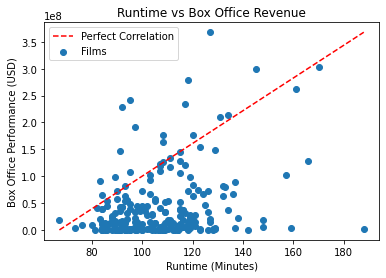

In [75]:
# scatter plot of the correlation
fig, ax = plt.subplots()


ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="Films")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="Perfect Correlation", color='r')



ax.set_title("Runtime vs Box Office Revenue")
ax.set_xlabel("Runtime (Minutes)")
ax.set_ylabel("Box Office Performance (USD)")




ax.legend();

print(f' Low to medium correlation of 0.312')

There is a medium correlation between the run time of a film to its box office performance
We can conclude that there are other factors in play that contribute to box office performance other than run time.

In [76]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                235 non-null    int64 
 1   synopsis          235 non-null    object
 2   rating            235 non-null    object
 3   genre             235 non-null    object
 4   director          235 non-null    object
 5   writer            235 non-null    object
 6   theater_date      235 non-null    object
 7   dvd_date          235 non-null    object
 8   currency          235 non-null    object
 9   box_office        235 non-null    object
 10  runtime           235 non-null    object
 11  studio            235 non-null    object
 12  runtime_clean     235 non-null    object
 13  box_office_clean  235 non-null    object
dtypes: int64(1), object(13)
memory usage: 27.5+ KB


In [77]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [78]:
# counting the none-null values in the rating column
original_rt_movie_info['rating'].count()

1557

In [79]:
# creating a new dataframe of just the rating and the box office performance
df3 = rt_movie_info[['box_office_clean','rating']].copy()

In [80]:
rt_movie_info['rating']

1           R
6       PG-13
7           R
15          R
18      PG-13
        ...  
1530       PG
1537       NR
1541    PG-13
1542       NR
1545        R
Name: rating, Length: 235, dtype: object

In [81]:
# checking for null values
print(tn_movie_budgets.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [103]:
# checking the dtype
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 248.6+ KB


In [105]:
# turning the budget into a string so it is easy to clean
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(str)

In [106]:
# removing commas, dollar signs, and white space
# turning the production budget back into an integer so calculations can be performed
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(' ', '')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype(int)

In [107]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,$760507625,$2776345279
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,$241063875,$1045663875
2,3,Jun 7 2019,Dark Phoenix,350000000,$42762350,$149762350
3,4,May 1 2015,Avengers: Age of Ultron,330600000,$459005868,$1403013963
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,$620181382,$1316721747


In [102]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 248.6+ KB


In [108]:
# gathering descriptive statistics
tn_movie_budgets['production_budget'].describe()

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [109]:
tn_movie_budgets['production_budget'].median()

17000000.0

In [116]:
# counting the number of films with a production budget over $100 million

tn_movie_budgets[tn_movie_budgets['production_budget'] >= 100000000].count()

id                   406
release_date         406
movie                406
production_budget    406
domestic_gross       406
worldwide_gross      406
dtype: int64